# DSCI552 HW5

by Kartik Balodi  
Github Username: kartikbalodi  
USC ID: 5317465471

## 1. Decision Trees as Interpretable Models

In [1]:
import pandas as pd
import warnings

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.tree import _tree
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt

**(a) Download the Accute Inflamations data from https://archive.ics.uci.edu/ml/datasets/Acute+Inflammations.**  
  
Attribute Information:  
- a1 Temperature of patient { 35C-42C }  
- a2 Occurrence of nausea { yes, no }  
- a3 Lumbar pain { yes, no }  
- a4 Urine pushing (continuous need for urination) { yes, no }  
- a5 Micturition pains { yes, no }  
- a6 Burning of urethra, itch, swelling of urethra outlet { yes, no }  
- d1 decision: Inflammation of urinary bladder { yes, no }  
- d2 decision: Nephritis of renal pelvis origin { yes, no }

In [2]:
col_names = ['a1', 'a2', 'a3', 'a4', 'a5', 'a6', 'd1', 'd2']
col_dict = {i:col_names[i] for i in range(len(col_names))}
df1 = pd.read_table('../data/diagnosis.data',encoding='utf-16', header=None, decimal=',')
df1 = df1.rename(columns = col_dict)
df1 = df1.replace(to_replace=['no', 'yes'], value=[0, 1])
df1

,a1,a2,a3,a4,a5,a6,d1,d2
0,35.5,0,1,0,0,0,0,0
1,35.9,0,0,1,1,1,1,0
2,35.9,0,1,0,0,0,0,0
3,36.0,0,0,1,1,1,1,0
4,36.0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...
115,41.4,0,1,1,0,1,0,1
116,41.5,0,0,0,0,0,0,0
117,41.5,1,1,0,1,0,0,1
118,41.5,0,1,1,0,1,0,1


Let's get a count of the 2^2=4 category counts, corresponding to d1 = {0,1}, d2 = {0,1}

In [3]:
warnings.filterwarnings('ignore')

df1['Count'] = 0
df1['Count'].loc[(df1['d1'] == 0) & (df1['d2'] == 1)] = 1
df1['Count'].loc[(df1['d1'] == 1) & (df1['d2'] == 0)] = 2
df1['Count'].loc[(df1['d1'] == 1) & (df1['d2'] == 1)] = 3

In [4]:
print('(no,no):', df1['Count'].value_counts()[0])
print('(no,yes):', df1['Count'].value_counts()[1])
print('(yes,no):', df1['Count'].value_counts()[2])
print('(yes,yes):', df1['Count'].value_counts()[3])

(no,no): 30
(no,yes): 31
(yes,no): 40
(yes,yes): 19


**(b) Build a decision tree on the whole data set and plot it. (This data set is a multi-label data set. Sk-Learn seems to support building multi-label decision trees. Alternatively, you can use the label powerset method to convert it to a multiclass data set. Also, you can use the binary relevance method and build one decision tree for each label. It seems that the label powerset approach is more relevant here. Is that right?**  
  
The label powerset approach seems more relevant here than binary relevance, because we can face a situation where both diseases/neither are present. Given the data is rather well-balanced from above, and after reading the diagnosis.names descriptions for what constitutes major signs of each disease, it seems like the binary labelling and finding a good separating boundary should help in classifying accurately for the most part (hopefully).  
  
For example, the literature says that Acute Nephritis of renal pelvis origin sees patients suffer temperature of above 40 Celsius fevers at times, whereas Inflammation of urinary bladder rarely sees heightened temperatures above 38 Celsius. This implies that the decision tree should likely at some point make a decision based on temperature that if temperature < some number close to 38, classify as Inflammation of urinary bladder/none.  
  
Resources consulted: 
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [5]:
# note that here I change the default argument 'gini' for criterion to 'entropy' (i.e. Shannon entropy) because in part(d) 
# I discover that for splitter='best' (default argument) Shannon entropy performs best
clf = DecisionTreeClassifier(criterion='entropy')
X = df1.drop(['d1','d2','Count'],axis=1)
y = df1['Count']

clf = clf.fit(X, y)

[Text(0.4, 0.9, 'X[0] <= 37.95\nentropy = 1.954\nsamples = 120\nvalue = [30, 31, 40, 19]'),
 Text(0.2, 0.7, 'X[2] <= 0.5\nentropy = 0.918\nsamples = 60\nvalue = [20, 0, 40, 0]'),
 Text(0.1, 0.5, 'entropy = 0.0\nsamples = 40\nvalue = [0, 0, 40, 0]'),
 Text(0.3, 0.5, 'entropy = 0.0\nsamples = 20\nvalue = [20, 0, 0, 0]'),
 Text(0.6, 0.7, 'X[2] <= 0.5\nentropy = 1.448\nsamples = 60\nvalue = [10, 31, 0, 19]'),
 Text(0.5, 0.5, 'entropy = 0.0\nsamples = 10\nvalue = [10, 0, 0, 0]'),
 Text(0.7, 0.5, 'X[4] <= 0.5\nentropy = 0.958\nsamples = 50\nvalue = [0, 31, 0, 19]'),
 Text(0.6, 0.3, 'entropy = 0.0\nsamples = 21\nvalue = [0, 21, 0, 0]'),
 Text(0.8, 0.3, 'X[3] <= 0.5\nentropy = 0.929\nsamples = 29\nvalue = [0, 10, 0, 19]'),
 Text(0.7, 0.1, 'entropy = 0.0\nsamples = 10\nvalue = [0, 10, 0, 0]'),
 Text(0.9, 0.1, 'entropy = 0.0\nsamples = 19\nvalue = [0, 0, 0, 19]')]

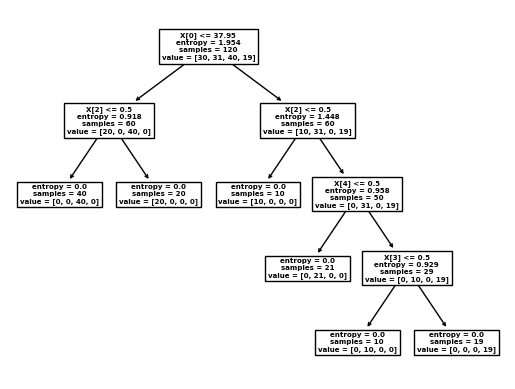

In [6]:
plot_tree(clf)

As expected, temperature plays a significant criterion in the decision (first split is via temperature), as per our hypothesis based on the literature from diagnosis.data. If we change the criterion to log-loss, the decision tree formed will use temperature first, and similarly the tree changes a bit if we use gini as the criterion for the decision tree, but fundamentally across the three criterion we see that a1, a2, a3, a4 seem to be sufficient in successfully classifying the training set correctly using decision trees.

**(c) Convert the decision rules into a set of IF-THEN rules. (You can use the code in https://www.kdnuggets.com/2017/05/simplifying-decision-tree-interpretation-decision-rules-python.html.)**

In [7]:
def tree_to_code(dtree, feature_names):
	"""
	Outputs a decision tree model as a Python function
	
	Parameters:
	-----------
	tree: decision tree model
		The decision tree to represent as a function
	feature_names: list
		The feature names of the dataset used for building the decision tree
	"""

	tree_ = dtree.tree_
	feature_name = [
		feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
		for i in tree_.feature
	]
	print("def tree({}):".format(", ".join(feature_names)))

	def recurse(node, depth):
		indent = "  " * depth
		if tree_.feature[node] != _tree.TREE_UNDEFINED:
			name = feature_name[node]
			threshold = tree_.threshold[node]
			print("{}if {} <= {}:".format(indent, name, threshold))
			recurse(tree_.children_left[node], depth + 1)
			print("{}else:  # if {} > {}".format(indent, name, threshold))
			recurse(tree_.children_right[node], depth + 1)
		else:
			print("{}return {}".format(indent, tree_.value[node]))

	recurse(0, 1)

In [8]:
tree_to_code(clf, col_names)

def tree(a1, a2, a3, a4, a5, a6, d1, d2):
  if a1 <= 37.95000076293945:
    if a3 <= 0.5:
      return [[ 0.  0. 40.  0.]]
    else:  # if a3 > 0.5
      return [[20.  0.  0.  0.]]
  else:  # if a1 > 37.95000076293945
    if a3 <= 0.5:
      return [[10.  0.  0.  0.]]
    else:  # if a3 > 0.5
      if a5 <= 0.5:
        return [[ 0. 21.  0.  0.]]
      else:  # if a5 > 0.5
        if a4 <= 0.5:
          return [[ 0. 10.  0.  0.]]
        else:  # if a4 > 0.5
          return [[ 0.  0.  0. 19.]]


Note: in the form above, for any boolean parameter (i.e. everything except a1), the threshold is a varying decimal due to random split. But really regardless of number whenever the if statement is <= a positive decimal between [0,1], it's equivalent to saying if parameter == no.

**(d) Use cost-complexity pruning to find a minimal decision tree and a set of decision rules with high interpretability.**  
  
Resources consulted: 
- https://stackoverflow.com/questions/46756606/what-does-splitter-attribute-in-sklearns-decisiontreeclassifier-do
- https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

In [9]:
dt = DecisionTreeClassifier()
parameters = {'criterion':('gini', 'entropy', 'log_loss'), 'max_depth':[1,2,3,4,5,6,7,8]}
clf = GridSearchCV(dt, parameters)
clf.fit(X, y)
clf.best_params_

{'criterion': 'entropy', 'max_depth': 4}

In [10]:
parameters = {'criterion':('gini', 'entropy', 'log_loss'), 'max_depth':[1,2,3,4,5,6,7,8], 'splitter':('best', 'random')}
clf = GridSearchCV(dt, parameters)
clf.fit(X, y)
clf.best_params_

{'criterion': 'gini', 'max_depth': 4, 'splitter': 'random'}

Setting splitter to 'best' as the only option gives the Shannon entropy criterion as the best decision tree. However, this changes to gini w/ 'random' best split when splitter = 'random' is also taken into comparison. The max_depth parameter changes between 3-6 when splitter is random, so we run this 100 times to see if there's any persistent/optimal max_depth.

In [11]:
counter = [0,0,0,0,0,0,0,0]

for i in range(100):
    parameters = {'max_depth':[1,2,3,4,5,6,7,8], 'splitter':('best','random')} #note default argument is gini
    clf = GridSearchCV(dt, parameters)
    clf.fit(X, y)
    counter[clf.best_params_['max_depth']-1] += 1

for i in range(len(counter)):
    print('max_depth:',str(i+1),'count: ',counter[i])

max_depth: 1 count:  0
max_depth: 2 count:  0
max_depth: 3 count:  12
max_depth: 4 count:  59
max_depth: 5 count:  19
max_depth: 6 count:  7
max_depth: 7 count:  3
max_depth: 8 count:  0


Thus, we have 
- splitter = 'random', max_depth = 6, criterion = 'gini' (which accounts for most cases observed in the 100 trials)
- splitter = 'best', max_depth = 4, criterion = 'entropy' (when splitter is left to its default)  
  
The most common occurrence for depth 4 levels, however we notice depth 5 and 6 are also fairly common when using 'random' splitter. I will choose to keep max_depth at 4, to avoid overfitting hopefully. The "Random" setting selects a feature at random, then splits it at random and calculates the gini. It repeats this a number of times, comparing all the splits and then takes the best one. This has a few advantages:
- It's less computation intensive than calculating the optimal split of every feature at every leaf.
- It should be less prone to overfitting.
- The additional randomness is useful if your decision tree is a component of an ensemble method.  
  
Next, we implement cost-complexity pruning and see what value for ccp_alpha lead to the best results. Off the bat, I highly doubt ccp_alpha will play any significance here, because depth 4 is not deep at all for the train set, given that there are 6 parameters for the decision tree to use at each node. The reason the depth is usually only 4, even when splitting is 'random', is because the parameters are likely well-separated with no/minimal overlaps between parameters and labels, so the max depth is low in this case.

In [12]:
path = dt.cost_complexity_pruning_path(X, y)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

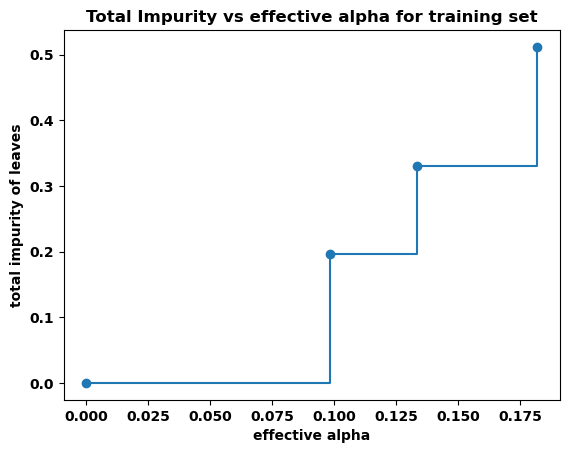

In [13]:
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [14]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(ccp_alpha=ccp_alpha)
    clf.fit(X, y)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.22291666666666676


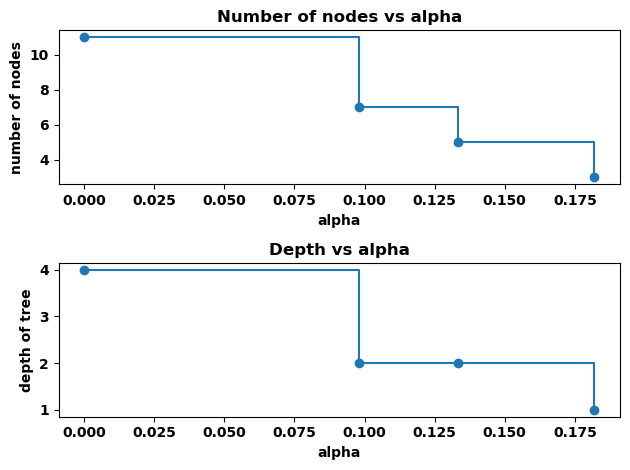

In [15]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

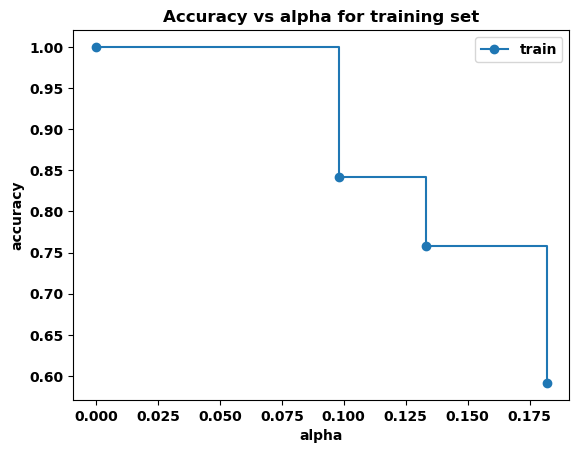

In [16]:
train_scores = [clf.score(X, y) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training set")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.legend()
plt.show()

In [17]:
parameters = {'criterion':('gini', 'entropy', 'log_loss'), 'splitter':('best', 'random'), 'ccp_alpha':ccp_alphas}
clf = GridSearchCV(dt, parameters)
clf.fit(X, y)
clf.best_params_

{'ccp_alpha': 0.0, 'criterion': 'entropy', 'splitter': 'random'}

As suspected, the ccp_alpha for the best case is 0. Finally, we bring this together for our final decision tree:

[Text(0.375, 0.9, 'X[2] <= 0.372\ngini = 0.735\nsamples = 120\nvalue = [30, 31, 40, 19]'),
 Text(0.16666666666666666, 0.7, 'X[3] <= 0.592\ngini = 0.32\nsamples = 50\nvalue = [10, 0, 40, 0]'),
 Text(0.08333333333333333, 0.5, 'gini = 0.0\nsamples = 10\nvalue = [10, 0, 0, 0]'),
 Text(0.25, 0.5, 'gini = 0.0\nsamples = 40\nvalue = [0, 0, 40, 0]'),
 Text(0.5833333333333334, 0.7, 'X[0] <= 39.255\ngini = 0.649\nsamples = 70\nvalue = [20, 31, 0, 19]'),
 Text(0.4166666666666667, 0.5, 'X[3] <= 0.545\ngini = 0.408\nsamples = 28\nvalue = [20, 8, 0, 0]'),
 Text(0.3333333333333333, 0.3, 'gini = 0.0\nsamples = 20\nvalue = [20, 0, 0, 0]'),
 Text(0.5, 0.3, 'gini = 0.0\nsamples = 8\nvalue = [0, 8, 0, 0]'),
 Text(0.75, 0.5, 'X[1] <= 0.212\ngini = 0.495\nsamples = 42\nvalue = [0, 23, 0, 19]'),
 Text(0.6666666666666666, 0.3, 'gini = 0.0\nsamples = 13\nvalue = [0, 13, 0, 0]'),
 Text(0.8333333333333334, 0.3, 'X[3] <= 0.241\ngini = 0.452\nsamples = 29\nvalue = [0, 10, 0, 19]'),
 Text(0.75, 0.1, 'gini = 0.0\nsa

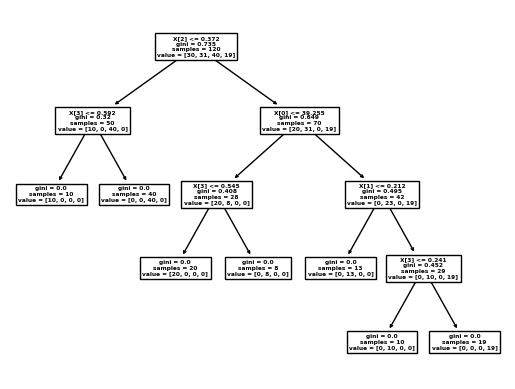

In [18]:
clf = DecisionTreeClassifier(criterion='gini', splitter='random', ccp_alpha=0.0, max_depth=4)
X = df1.drop(['d1','d2','Count'],axis=1)
y = df1['Count']

clf = clf.fit(X, y)
plot_tree(clf)

In [19]:
tree_to_code(clf, col_names)

def tree(a1, a2, a3, a4, a5, a6, d1, d2):
  if a3 <= 0.3718813934232487:
    if a4 <= 0.5916477458512633:
      return [[10.  0.  0.  0.]]
    else:  # if a4 > 0.5916477458512633
      return [[ 0.  0. 40.  0.]]
  else:  # if a3 > 0.3718813934232487
    if a1 <= 39.2551995002456:
      if a4 <= 0.5453665710731254:
        return [[20.  0.  0.  0.]]
      else:  # if a4 > 0.5453665710731254
        return [[0. 8. 0. 0.]]
    else:  # if a1 > 39.2551995002456
      if a2 <= 0.21249169260845133:
        return [[ 0. 13.  0.  0.]]
      else:  # if a2 > 0.21249169260845133
        if a4 <= 0.24079433094747102:
          return [[ 0. 10.  0.  0.]]
        else:  # if a4 > 0.24079433094747102
          return [[ 0.  0.  0. 19.]]


When the splitter is set to 'random', temperature/a1 is not guaranteed to be a parameter chosen by the decision tree. However, if we set the splitter to 'best' and consequently pick Shannon entropy as our criterion, which as explained earlier is the best criterion when the splitter is set to 'best', we observe that temperature is the first criterion chosen by our decision tree (as seen by the tree_to_code call made before).
  
Note: in the form above, for any boolean parameter (i.e. everything except temperature/a1), the threshold is a varying decimal due to random split. But really regardless of number whenever the if statement is <= a positive decimal between [0,1], it's equivalent to saying if parameter == no.

## 2. The LASSO and Boosting for Regression

In [20]:
import pandas as pd
import numpy as np
import math

from scipy.stats import variation

from sklearn.preprocessing import StandardScaler, scale
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_val_score
import xgboost as xgb

import seaborn as sns

**(a) Download the Communities and Crime data (Question you may encounter: I tried opening the dataset and download it but the file is not readable. How to download the file? Just change .data to .csv.) from https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime. Use the first 1495 rows of data as the training set and the rest as the test set.**

**(b) The data set has missing values. Use a data imputation technique to deal with the missing values in the data set. The data description mentions some features are nonpredictive. Ignore those features.**

There's various types of imputation techniques out there - in HW2 I used simple imputing by interpolating data to fill in the missing values in between. I would prefer to avoid that here, because the the data here is unordered/unsorted, so fitting in a mean based on a community might not be a very meaningful way to imputing data. Multiple imputing models each feature with missing values as a function of other features, and uses that estimate for imputation via a series of round-robin regressions on each missing value. We do not want to do that here because that will likely increase correlation later on in our analysis since we will perform regressions later on in the assignment. Thus, here I'll use KNNImputing as my data imputation method of choice - I will likely keep the weights uniform because they data is unordered/unsorted since each row represents a community.
  
Resources consulted:  
- https://scikit-learn.org/stable/modules/impute.html
- https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html#sklearn.impute.KNNImputer

In [21]:
col_name_list = []
col_name_file = '../data/communities.names'
file = open(col_name_file, 'r')
lines = file.readlines()
for line in lines:
    x = line.split()
    if len(x) > 0:
        if x[0] == '@attribute':
            col_name_list.append(x[1])

df2 = pd.read_csv('../data/communities.csv',header=None)
df2.columns = col_name_list
df2 = df2.replace('?', np.NaN)
df2 = df2.iloc[:, 5:]

In [22]:
imputer = KNNImputer(n_neighbors=11, weights="uniform")
df2_imputed = pd.DataFrame(imputer.fit_transform(df2), columns=df2.columns)

#this part addresses the last bit of part 2(a)
df2_train = df2_imputed.iloc[:1495]
df2_test = df2_imputed.iloc[1495:]

**(c) Plot a correlation matrix for the features in the data set.**

Bright yellow denotes perfect positive correlation (+1), dark purple denotes perfect negative correlation (-1), turqoise (between blue and green) denotes zero correlation.

In [23]:
correlations = df2_imputed.drop('ViolentCrimesPerPop',axis=1).corr()
fig = plt.figure(figsize=(100,100))
ax = fig.add_subplot(111)
cax = ax.imshow(correlations)
fig.colorbar(cax)
ticks = np.arange(0,122,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(df2_imputed.drop('ViolentCrimesPerPop',axis=1).columns)
ax.set_yticklabels(df2_imputed.drop('ViolentCrimesPerPop',axis=1).columns)
plt.show()

**(d) Calculate the Coefficient of Variation CV for each feature, where CV = s/m , in which s is sample standard deviation and m is sample mean.**

(m/s)\*sqrt(n), or CV^-1\*sqrt(n) is the t-stat when test for Beta=0 (whether a feature is statistically significant), thus CV = sqrt(n)/t-stat. Coefficient of Variance is thus a measure of significance level, and the smaller the CV, the more statistically significant the variable is, because sqrt(n) is fixed/constant, and thus the bigger the t-stat, the smaller the CV is.
  
Resources consulted:
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.variation.html

In [24]:
cvs=[]
for i in df2_imputed.iloc[:,:-1].columns:
    cv = variation(df2_imputed[i])
    print("Feature "+str(i)+" : "+str(cv))
    cvs.append(cv)

Feature population : 2.20294993386533
Feature householdsize : 0.3532097004119048
Feature racepctblack : 1.4105665605340265
Feature racePctWhite : 0.3237003633601353
Feature racePctAsian : 1.3588213380942629
Feature racePctHisp : 1.6138729571484036
Feature agePct12t21 : 0.36574812216270847
Feature agePct12t29 : 0.2906199873800477
Feature agePct16t24 : 0.4950363361780536
Feature agePct65up : 0.4233355166105009
Feature numbUrban : 2.0012416335137146
Feature pctUrban : 0.6386886583257786
Feature medIncome : 0.5796080008727312
Feature pctWWage : 0.32762787426405326
Feature pctWFarmSelf : 0.6998545594658827
Feature pctWInvInc : 0.3591498556991753
Feature pctWSocSec : 0.3684202133633635
Feature pctWPubAsst : 0.6988551987450082
Feature pctWRetire : 0.3495513990736716
Feature medFamInc : 0.5275995387856797
Feature perCapInc : 0.5454965924474838
Feature whitePerCap : 0.5074249049035463
Feature blackPerCap : 0.5893211744649158
Feature indianPerCap : 0.8094820310422648
Feature AsianPerCap : 0.6060

**(e) Pick floor(√128) features with highest CV , and make scatter plots and box plots for them. Can you draw conclusions about significance of those features, just by the scatter plots?**

In [25]:
max_cvs_index = np.argpartition(cvs, -math.floor(np.sqrt(128)) )[-math.floor(np.sqrt(128)):]
max_cvs_columns = df2_imputed.columns[max_cvs_index].tolist()
max_cvs_columns

['PolicOperBudg',
 'HousVacant',
 'LemasSwornFT',
 'numbUrban',
 'population',
 'NumIlleg',
 'NumStreet',
 'NumImmig',
 'NumUnderPov',
 'LemasPctOfficDrugUn',
 'NumInShelters']

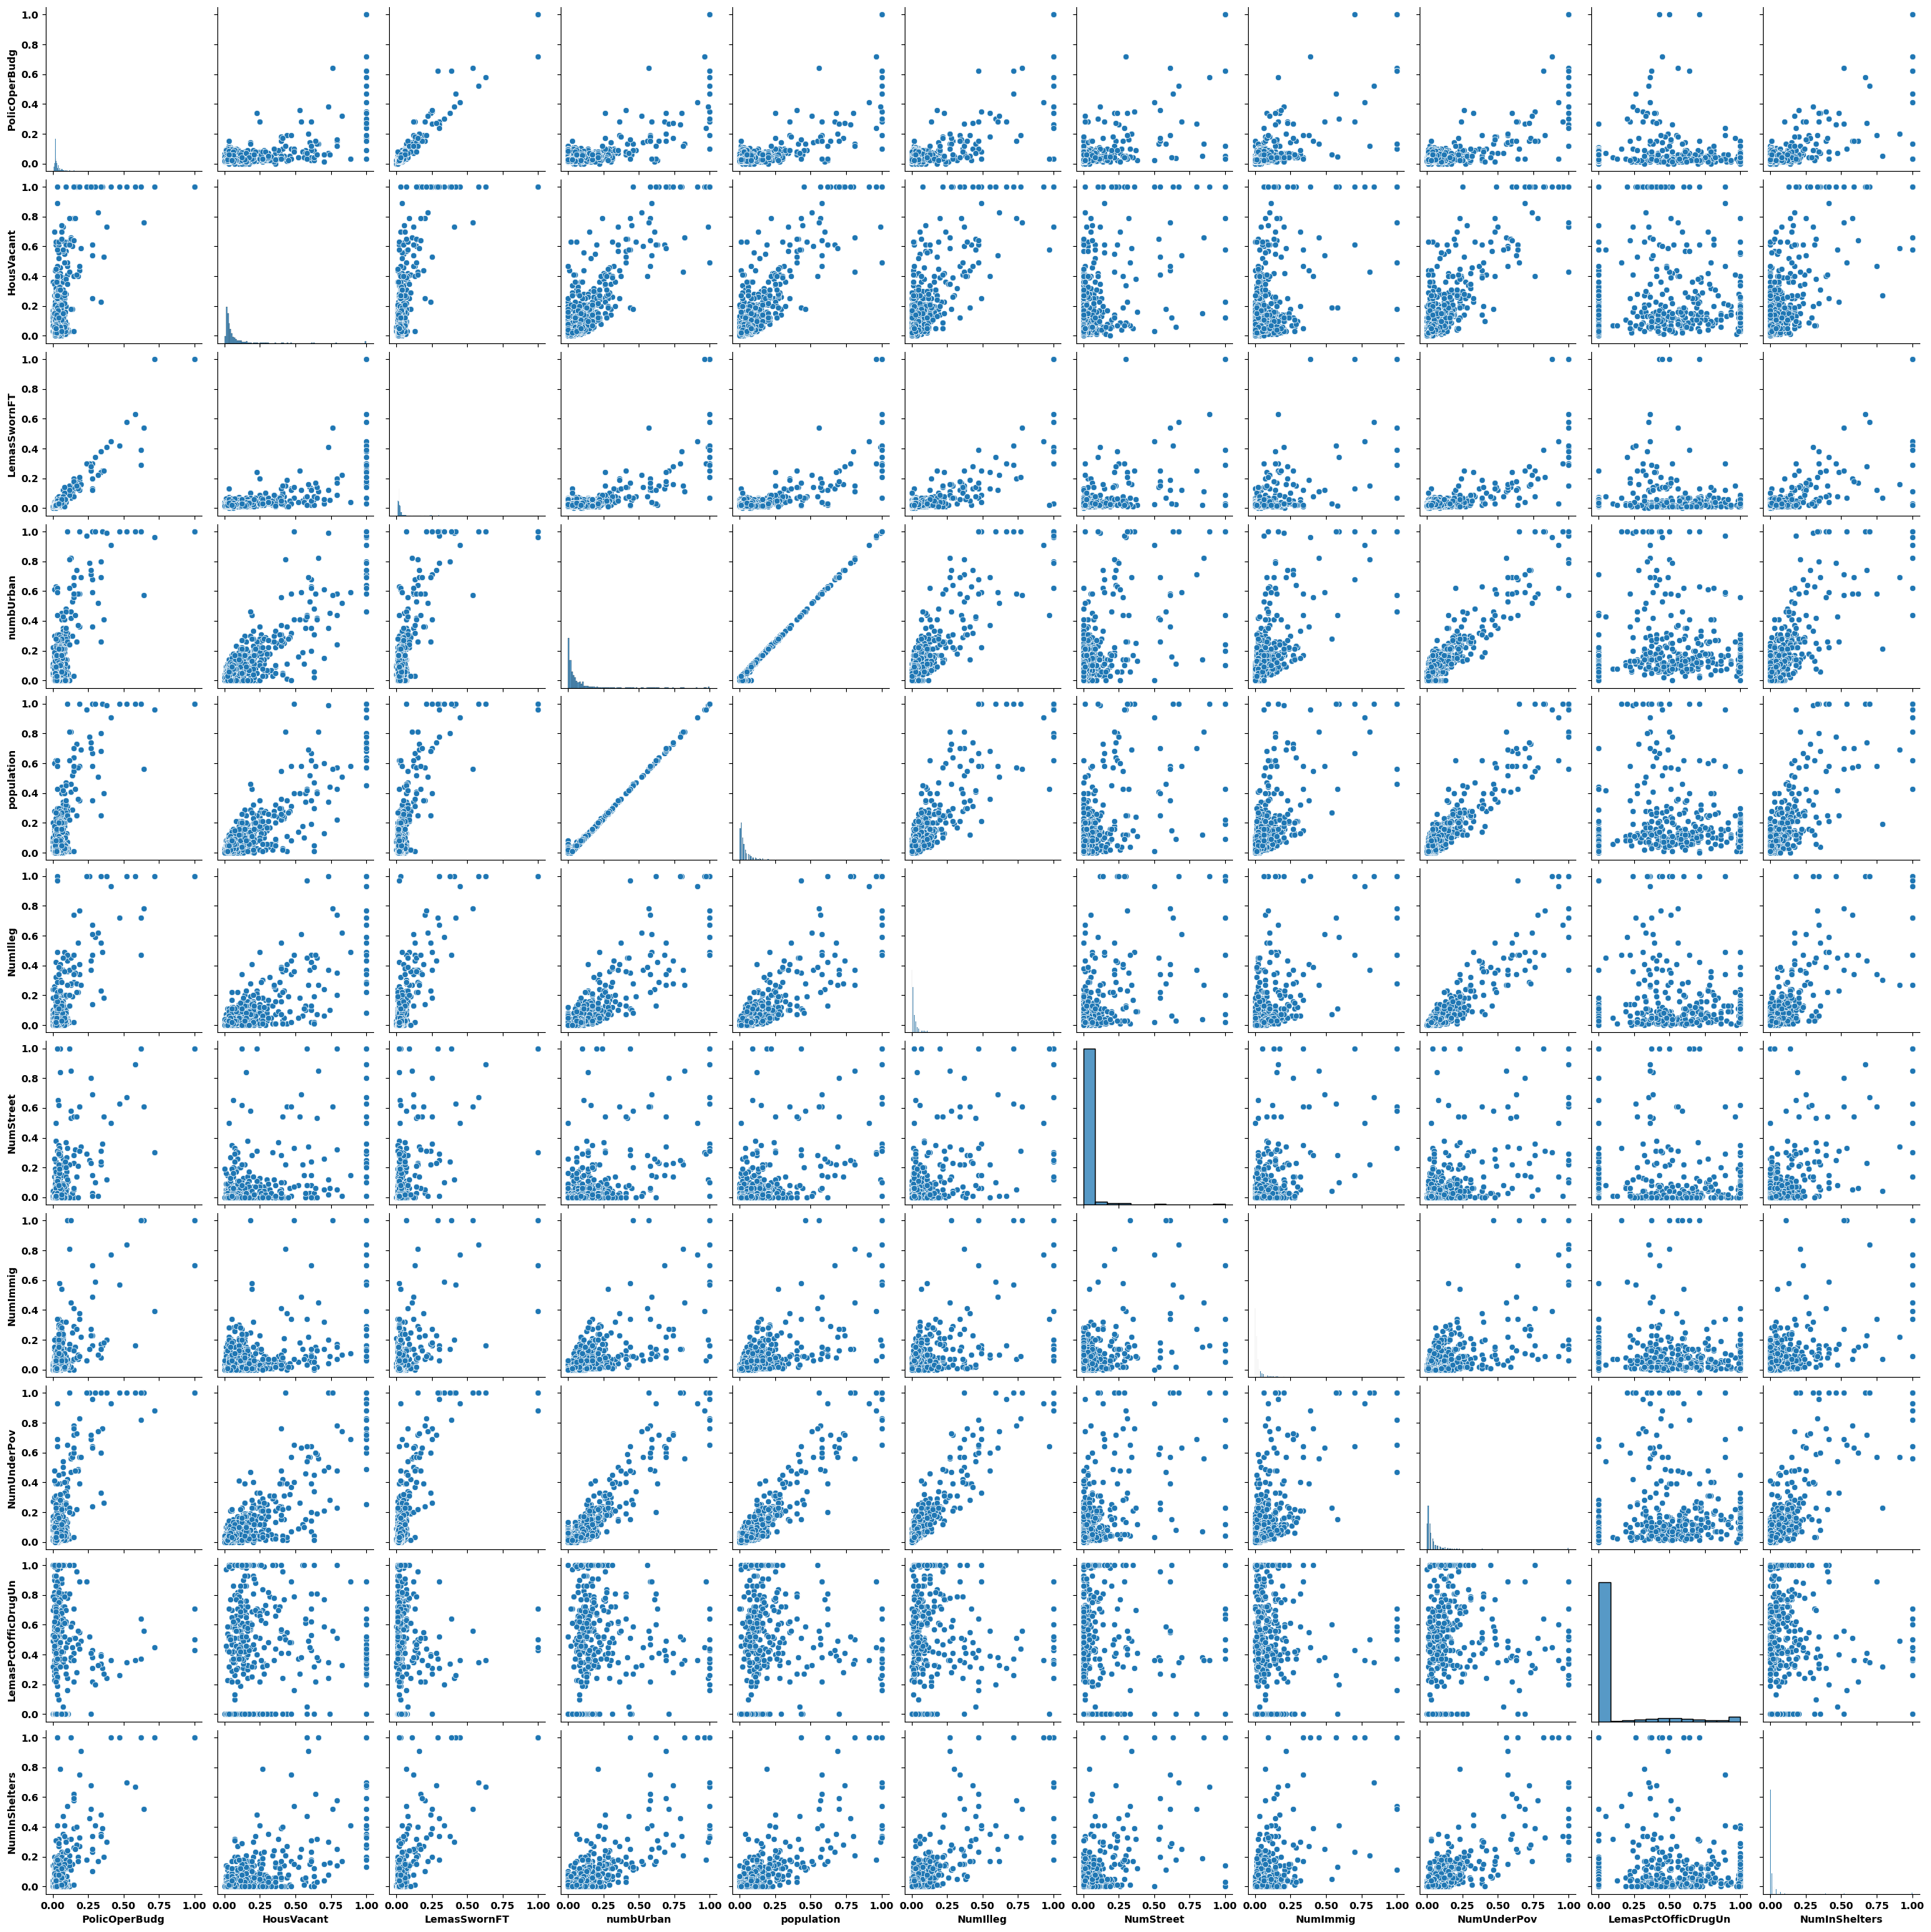

In [26]:
df2_highest_cvs = df2_imputed[max_cvs_columns]
sns.pairplot(df2_highest_cvs)

The data here seems to be uncorrelated/weakly uncorrelated for most variables, with the exception of numbUrban and population, where there's near perfect correlation. We expect this to be the case because number of people living in areas classified as urban is effectively a proportion of population of the community.

<AxesSubplot:>

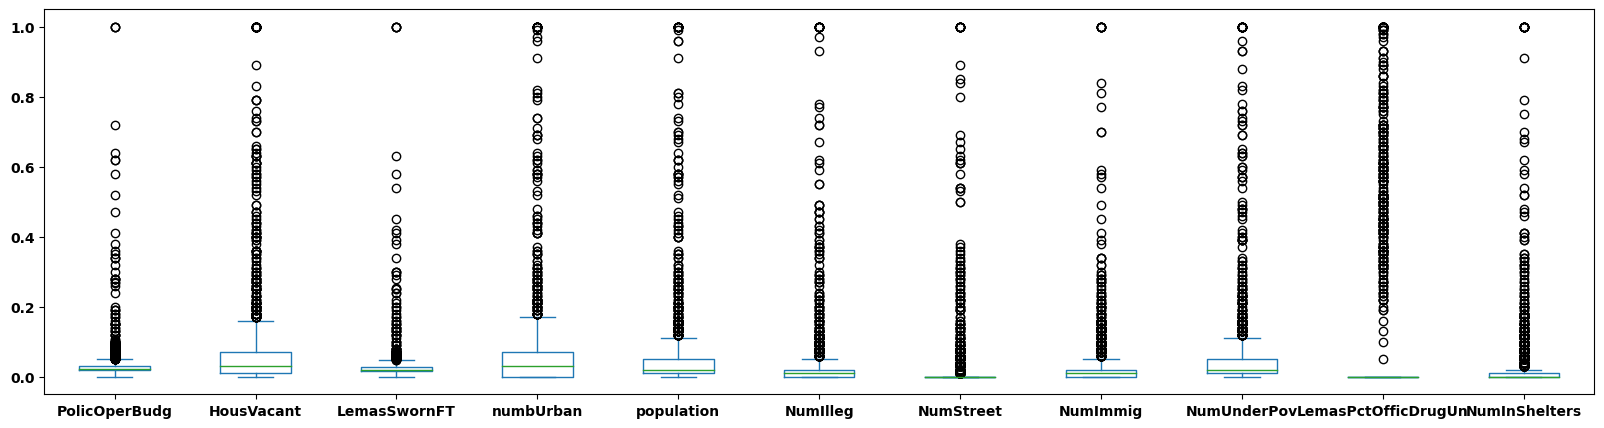

In [27]:
df2_highest_cvs.plot(kind='box',figsize=(20,5))

In [28]:
plt.close()

**(f) Fit a linear model using least squares to the training set and report the test error.**

Resources consulted:
- https://stackoverflow.com/questions/24378176/python-sci-kit-learn-metrics-difference-between-r2-score-and-explained-
- https://scikit-learn.org/stable/modules/generated/sklearn.metrics.explained_variance_score.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [29]:
X_train = df2_train.drop('ViolentCrimesPerPop',axis=1)
y_train = df2_train['ViolentCrimesPerPop']
X_test = df2_test.drop('ViolentCrimesPerPop',axis=1)
y_test = df2_test['ViolentCrimesPerPop']

lin_m = LinearRegression().fit(X_train, y_train)
pred = lin_m.predict(X_test)

In [30]:
# Report Test error
print('MSE for test data:', str(metrics.mean_squared_error(y_test,pred)))
print('R^2 for test data:', str(lin_m.score(X_test,y_test)))
print('Explained variance for test data:', str(metrics.explained_variance_score(y_test,pred)))

MSE for test data: 0.01874589277922809
R^2 for test data: 0.60580855235579
Explained variance for test data: 0.6072736120592993


The explained variance and R^2 are almost the same indicating low level of bias in our analysis using the OLS model.

**(g) Fit a ridge regression model on the training set, with λ chosen by cross-validation. Report the test error obtained.**  
  
Resources consulted:
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html

In [31]:
#first we find which 1eX value for λ to see which magnitude of lambda gives us the best results for ridge regression
lambdas = [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]
ridge_m = RidgeCV(alphas=lambdas,cv=5).fit(X_train,y_train)
ridge_m.alpha_

1.0

In [32]:
lambdas = np.arange(0.1, 10.1, 0.1) #testing for all lambdas in the range [1e-1,1e1] with a 0.1 increment
ridge_m = RidgeCV(alphas=lambdas,cv=5).fit(X_train,y_train)
ridge_m.alpha_ #best lambda

1.9000000000000001

In [33]:
pred = ridge_m.predict(X_test)

# Report Test error
print('MSE for test data:', str(metrics.mean_squared_error(y_test,pred)))
print('R^2 for test data:', str(ridge_m.score(X_test,y_test)))
print('Explained variance for test data:', str(metrics.explained_variance_score(y_test,pred)))

MSE for test data: 0.017207790642531095
R^2 for test data: 0.6381519949983872
Explained variance for test data: 0.6392624055450986


**(h) Fit a LASSO model on the training set, with λ chosen by cross-validation. Report
the test error obtained, along with a list of the variables selected by the model.
Repeat with standardized (In this data set, features are already normalized.)
features. Report the test error for both cases and
compare them.**  

Resources Consulted:  
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html
- https://datascience.stackexchange.com/questions/45900/when-to-use-standard-scaler-and-when-normalizer
- https://stackoverflow.com/questions/39120942/difference-between-standardscaler-and-normalizer-in-sklearn-preprocessing
- https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

In [34]:
lasso_m = LassoCV(eps=1e-3, n_alphas=1000, cv=5).fit(X_train, y_train)
lasso_m.alpha_

0.0001158555595564521

In [35]:
lambdas = np.arange(1e-5, 1e-3, 1e-6) #testing for all lambdas in the range [1e-5,1e-3] with a 1e-6 increment
lasso_m = LassoCV(alphas=lambdas, cv=5, max_iter=10000).fit(X_train,y_train)
lasso_m.alpha_

0.00011700000000000007

Therefore, the best lambda without standardizing is 0.000117

In [36]:
pred = lasso_m.predict(X_test)

# Report Test error
print('MSE for test data:', str(metrics.mean_squared_error(y_test,pred)))
print('R^2 for test data:', str(lasso_m.score(X_test,y_test)))
print('Explained variance for test data:', str(metrics.explained_variance_score(y_test,pred)))

MSE for test data: 0.017292512388710116
R^2 for test data: 0.636370453400632
Explained variance for test data: 0.6373882213529778


In [37]:
lasso_m.coef_

array([-0.        ,  0.        ,  0.19616925,  0.        , -0.02859064,
        0.        ,  0.0471164 , -0.23670912,  0.        ,  0.01720113,
       -0.        ,  0.045915  ,  0.        , -0.06177179,  0.02490456,
       -0.1099064 ,  0.04488373,  0.04357887, -0.1152759 ,  0.        ,
       -0.        , -0.06745655, -0.01783444, -0.02657072,  0.02588289,
        0.01618116,  0.02057478, -0.        , -0.16063514, -0.01946881,
        0.        ,  0.        ,  0.        ,  0.12476125, -0.01684806,
        0.00441284,  0.00423485,  0.        ,  0.11100838,  0.12894697,
       -0.07431063, -0.        ,  0.        , -0.        , -0.18843026,
       -0.03415086, -0.        ,  0.        , -0.11610937, -0.0982122 ,
        0.07536663, -0.00759981, -0.        , -0.00798477, -0.        ,
       -0.00072311, -0.        ,  0.        ,  0.        ,  0.00413443,
       -0.        , -0.06262927, -0.        , -0.07075209,  0.04547677,
       -0.        , -0.        , -0.05686214,  0.14622097,  0.05

In [38]:
#variables selected by this model
print("Features selected by Lasso Regressor:\n")
counter = 0 
for index,coef_value in enumerate(lasso_m.coef_.tolist()):
    if coef_value != 0:
        print(str(df2_imputed.columns[index]))
        counter += 1
print("Number of features selected:", counter)

Features selected by Lasso Regressor:

racepctblack
racePctAsian
agePct12t21
agePct12t29
agePct65up
pctUrban
pctWWage
pctWFarmSelf
pctWInvInc
pctWSocSec
pctWPubAsst
pctWRetire
whitePerCap
blackPerCap
indianPerCap
AsianPerCap
OtherPerCap
HispPerCap
PctPopUnderPov
PctLess9thGrade
PctEmploy
PctEmplManu
PctEmplProfServ
PctOccupManu
MalePctDivorce
MalePctNevMarr
FemalePctDiv
PctKids2Par
PctYoungKids2Par
PctWorkMom
NumIlleg
PctIlleg
NumImmig
PctImmigRec5
PctImmigRec10
PctRecImmig10
PctNotSpeakEnglWell
PctLargHouseOccup
PersPerOccupHous
PctPersOwnOccup
PctPersDenseHous
PctHousLess3BR
HousVacant
PctHousOccup
PctVacantBoarded
PctVacMore6Mos
MedYrHousBuilt
PctHousNoPhone
PctWOFullPlumb
OwnOccLowQuart
RentLowQ
MedRent
MedRentPctHousInc
MedOwnCostPctInc
MedOwnCostPctIncNoMtg
NumInShelters
NumStreet
PctForeignBorn
PctSameHouse85
PctSameCity85
LemasSwFTFieldPerPop
LemasTotalReq
PolicReqPerOffic
RacialMatchCommPol
PctPolicBlack
PctPolicHisp
PctPolicAsian
PolicAveOTWorked
LandArea
PopDens
PctUsePubTra

Next, we standardize data and repeat our steps above:  
  
Piazza post @1063:  
Q: I expect the MSE to change by standardizing but the R^2 should not be too greatly impacted. Why should or shouldn't we standardize the y variable for both of the train and test sets? Is there any time when one is encouraged over the other?  
A: usually, it is not required to standardize the response. As for why you should/should not it really depends from case to case. Ask yourself this. what d you want to gain from standardising and normalizing? For the features we do it so that there arent multiple different units etc, but by doing so for the response, what help would it be for the model? If i have my response variable that is very large and need heavy computations on it then i might want to scale it, so that i can reduce my computational requirements. So think along these lines

In [39]:
scaler = StandardScaler()
df2_imputed_scaled = pd.DataFrame(data=scaler.fit_transform(df2_imputed), columns=df2_imputed.columns)

df2_train_scaled = df2_imputed_scaled.iloc[:1495]
df2_test_scaled = df2_imputed_scaled.iloc[1495:]

#note: I originally scaled y_train/test, but eventually decided against it after thinking about the advice from piazza @1063
X_train_scaled = df2_train_scaled.drop('ViolentCrimesPerPop',axis=1)
y_train = df2_train['ViolentCrimesPerPop']
X_test_scaled = df2_test_scaled.drop('ViolentCrimesPerPop',axis=1)
y_test = df2_test['ViolentCrimesPerPop']

In [40]:
lasso_m = LassoCV(eps=1e-3, n_alphas=1000, cv=5).fit(X_train_scaled, y_train)
lasso_m.alpha_

0.0007206943190891286

In [41]:
lambdas = np.arange(1e-3, 1e-2, 1e-4) #testing for all lambdas in the range [1e-3,1e-2] with a 1e-4 increment
lasso_m = LassoCV(alphas=lambdas, cv=5, max_iter=10000).fit(X_train_scaled,y_train)
lasso_m.alpha_

0.001

Therefore, the best lambda with standardizing is 0.001

In [42]:
pred_scaled = lasso_m.predict(X_test_scaled)

# Report Test error
print('MSE for test data:', str(metrics.mean_squared_error(y_test,pred_scaled)))
print('R^2 for test data:', str(lasso_m.score(X_test_scaled,y_test)))
print('Explained variance for test data:', str(metrics.explained_variance_score(y_test,pred_scaled)))

MSE for test data: 0.017280697171849442
R^2 for test data: 0.6366189055545726
Explained variance for test data: 0.6376747287627145


In [43]:
#variables selected by this model
print("Features selected by Lasso Regressor after standardizing:\n")
counter = 0 
for index,coef_value in enumerate(lasso_m.coef_.tolist()):
    if coef_value != 0:
        print(str(df2_imputed.columns[index]))
        counter += 1
print("Number of features selected:", counter)

Features selected by Lasso Regressor after standardizing:

racepctblack
racePctAsian
agePct12t21
agePct12t29
agePct65up
pctUrban
pctWWage
pctWFarmSelf
pctWInvInc
pctWSocSec
pctWPubAsst
pctWRetire
whitePerCap
blackPerCap
indianPerCap
AsianPerCap
OtherPerCap
HispPerCap
PctPopUnderPov
PctLess9thGrade
PctEmploy
PctEmplManu
MalePctDivorce
MalePctNevMarr
FemalePctDiv
PctKids2Par
PctYoungKids2Par
PctWorkMom
NumIlleg
PctIlleg
NumImmig
PctImmigRec5
PctLargHouseOccup
PctPersOwnOccup
PctPersDenseHous
PctHousLess3BR
HousVacant
PctHousOccup
PctVacantBoarded
PctVacMore6Mos
MedYrHousBuilt
PctWOFullPlumb
RentLowQ
MedRent
MedRentPctHousInc
MedOwnCostPctIncNoMtg
NumInShelters
NumStreet
PctForeignBorn
PctSameCity85
LemasSwFTFieldPerPop
LemasTotalReq
LemasTotReqPerPop
PolicReqPerOffic
RacialMatchCommPol
PctPolicBlack
PctPolicHisp
PctPolicAsian
PolicAveOTWorked
LandArea
PopDens
PctUsePubTrans
PolicCars
PolicOperBudg
LemasGangUnitDeploy
LemasPctOfficDrugUn
PolicBudgPerPop
Number of features selected: 67


R^2 and explained variance improve slightly after standardizing, indicating marginal impact of standardizing on LASSO outputs for this model. This could be due to the fact that the original dataset is already normalized.

**(i) Fit a PCR model on the training set, with M (the number of principal components) chosen by cross-validation. Report the test error obtained.**

I don't really understand the details of how PCR/PCA/PLS works, and I really dislike the hand-wavy-ness of qualitative explanations in lecture because we avoided the math/proof of its effectiveness entirely.  
  
Resources consulted:  
- https://scikit-learn.org/stable/auto_examples/cross_decomposition/plot_pcr_vs_pls.html
- https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.make_pipeline.html#sklearn.pipeline.make_pipeline
- https://stats.stackexchange.com/questions/82050/principal-component-analysis-and-regression-in-python
- https://analyticsindiamag.com/a-hands-on-guide-to-principal-component-regression-in-python/
- https://scikit-learn.org/stable/modules/model_evaluation.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

In [44]:
pca = PCA()
X_train_reduced = pca.fit_transform(X_train_scaled)
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([23.5 , 38.98, 48.3 , 55.12, 60.72, 64.62, 67.9 , 70.97, 73.58,
       75.35, 76.81, 78.17, 79.5 , 80.74, 81.77, 82.72, 83.62, 84.42,
       85.14, 85.85, 86.54, 87.17, 87.76, 88.31, 88.85, 89.36, 89.83,
       90.28, 90.73, 91.17, 91.59, 92.  , 92.39, 92.76, 93.12, 93.46,
       93.78, 94.09, 94.38, 94.66, 94.92, 95.16, 95.4 , 95.63, 95.85,
       96.06, 96.26, 96.45, 96.63, 96.8 , 96.96, 97.12, 97.28, 97.43,
       97.57, 97.7 , 97.83, 97.94, 98.05, 98.15, 98.25, 98.35, 98.44,
       98.52, 98.6 , 98.68, 98.75, 98.82, 98.88, 98.94, 99.  , 99.05,
       99.1 , 99.15, 99.2 , 99.25, 99.3 , 99.34, 99.38, 99.42, 99.46,
       99.49, 99.52, 99.55, 99.58, 99.61, 99.64, 99.67, 99.7 , 99.72,
       99.74, 99.76, 99.78, 99.8 , 99.82, 99.84, 99.85, 99.86, 99.87,
       99.88, 99.89, 99.9 , 99.91, 99.92, 99.93, 99.94, 99.95, 99.95,
       99.95, 99.95, 99.95, 99.95, 99.95, 99.95, 99.95, 99.95, 99.95,
       99.95, 99.95, 99.95, 99.95, 99.95])

Clearly, the first 3 throws (28 components) explain 90% of the variance, first 5 row (42 components) explain 95% of the variance, and the first 8 rows (72 components) explain 99% of the variance.

In [45]:
n = len(X_train_reduced)
kfold = KFold(n_splits=5, shuffle=True) #5-fold CV, with shuffle
regr = LinearRegression()
mse = []

#Do one CV to get MSE for just the intercept (no principal components in regression)
score = -1*cross_val_score(regr, np.ones((n,1)), y_train.ravel(), cv=kfold, 
                                            scoring='neg_mean_squared_error').mean()    
mse.append(score) 

#Do CV for the n=122 principle components, adding one component to the regression at the time
for i in np.arange(1,n+1):
    score = -1*cross_val_score(regr, X_train_reduced[:,:i], y_train.ravel(), cv=kfold, 
                                                scoring='neg_mean_squared_error').mean()
    mse.append(score)

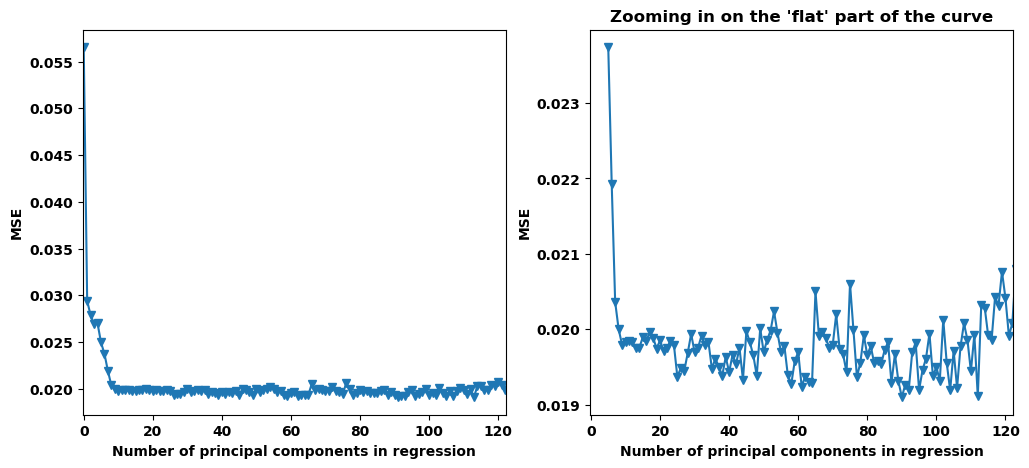

In [46]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,5))
ax1.plot(mse, '-v')
ax2.plot([i for i in range(5,n)], mse[6:n+1], '-v')
ax2.set_title('Zooming in on the \'flat\' part of the curve')

for ax in fig.axes:
    ax.set_xlabel('Number of principal components in regression')
    ax.set_ylabel('MSE')
    ax.set_xlim((-0.2,122.2))

In [47]:
best_M = np.array(mse).argsort()[0]
best_M

91

In [48]:
pca = PCA(n_components=best_M)
X_train_reduced = pca.fit_transform(X_train_scaled)
X_test_reduced = pca.transform(X_test_scaled)

lm = LinearRegression().fit(X_train_reduced,y_train)
pred_PCR = lm.predict(X_test_reduced)

# Report Test error
print('MSE for test data:', str(metrics.mean_squared_error(y_test,pred_PCR)))
print('R^2 for test data:', str(lm.score(X_test_reduced,y_test)))
print('Explained variance for test data:', str(metrics.explained_variance_score(y_test,pred_PCR)))

MSE for test data: 0.017664244723617835
R^2 for test data: 0.6285536100547762
Explained variance for test data: 0.6295287261098674


**(j) In this section, we would like to fit a boosting tree to the data. As in classification trees, one can use any type of regression at each node to build a multivariate regression tree. Because the number of variables is large in this problem, one
can use L1-penalized regression at each node. Such a tree is called L1 penalized gradient boosting tree. You can use XGBoost (Some hints on installing XGBoost on Windows: https://picnet.com.au/blog/xgboost-windows-x64-binaries-for-download/.) to fit the model tree. Determine α (the regularization term) using cross-validation.**

Resources consulted:
- https://xgboost.readthedocs.io/en/stable/python/python_api.html

In [49]:
kfold = KFold(n_splits=5, shuffle=True) #5-fold CV, with shuffle

lambdas = [1e-10, 1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
mse_lambdas = []

for l1_penalty in lambdas:
    
    kval_MSE = []
    for training_indexes,validation_indexes in kfold.split(X_train):
        
        X_train_k, X_train_val = X_train.iloc[training_indexes.tolist(),:],X_train.iloc[validation_indexes.tolist(),:]
        y_train_k, y_train_val = y_train[training_indexes.tolist()],y_train[validation_indexes.tolist()]
        
        #reg_alpha: float (xgb's alpha/L1 regularization term)
        xgb_reg = xgb.XGBRegressor(reg_alpha=l1_penalty).fit(X_train_k,y_train_k)
        pred_xgb = xgb_reg.predict(X_train_val)
        
        mse = metrics.mean_squared_error(y_train_val,pred_xgb)
        kval_MSE.append(mse)
    
    mse_lambdas.append(np.mean(kval_MSE))
    
lowest_lambda = lambdas[np.array(mse_lambdas).argsort()[0]]
lowest_lambda

1e-07

In [50]:
kfold = KFold(n_splits=5, shuffle=True) #5-fold CV, with shuffle

lambdas = np.arange(lowest_lambda/10,lowest_lambda*10,lowest_lambda/10)
mse_lambdas = []

for l1_penalty in lambdas:
    
    kval_MSE = []
    for training_indexes,validation_indexes in kfold.split(X_train):
        
        X_train_k, X_train_val = X_train.iloc[training_indexes.tolist(),:],X_train.iloc[validation_indexes.tolist(),:]
        y_train_k, y_train_val = y_train[training_indexes.tolist()],y_train[validation_indexes.tolist()]
        
        #reg_alpha: float (xgb's alpha/L1 regularization term)
        xgb_reg = xgb.XGBRegressor(reg_alpha=l1_penalty).fit(X_train_k,y_train_k)
        pred_xgb = xgb_reg.predict(X_train_val)
        
        mse = metrics.mean_squared_error(y_train_val,pred_xgb)
        kval_MSE.append(mse)
    
    mse_lambdas.append(np.mean(kval_MSE))
    
lowest_lambda = lambdas[np.array(mse_lambdas).argsort()[0]]
lowest_lambda

6e-08

In [51]:
xgb_reg = xgb.XGBRegressor(reg_alpha=lowest_lambda).fit(X_train,y_train)
pred_xgb = xgb_reg.predict(X_test)

# Report Test error
print('MSE for test data:', str(metrics.mean_squared_error(y_test,pred_xgb)))
print('R^2 for test data:', str(xgb_reg.score(X_test,y_test)))
print('Explained variance for test data:', str(metrics.explained_variance_score(y_test,pred_xgb)))

MSE for test data: 0.017318209713408132
R^2 for test data: 0.6358300861989952
Explained variance for test data: 0.6429464325164278
